In [ ]:
"""
Purpose: To take in a whole neuron that could have any number of somas
and then to split it into multiple neuron objects

Pseudocode: 
1) Get all of the split suggestions
2) Split all of the limbs that need splitting
3) Once have split the limbs, split the neuron object into mutliple objects


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2020-12-28 03:40:28,786 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-28 03:40:28,788 - settings - Setting database.user to celiib
INFO - 2020-12-28 03:40:28,789 - settings - Setting database.password to newceliipass
INFO - 2020-12-28 03:40:28,799 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-12-28 03:40:28,800 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-28 03:40:28,812 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-12-28 03:40:29,072 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2020-12-28 03:40:29,153 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-28 03:40:29,402 - settings - Setting enable_python_native_blobs to True


In [5]:
minnie.DecompositionMultiSoma() & "n_somas>=2"# & "n_limbs>7"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134988402042,0,0.25,=BLOB=,939750,1891203,1,0,1,2,11,260,129,9926423.076049272,3837120.3077007174,19498.793,99.274,99.274,489.663,475.385,3464,0.00034896759622890023,13.323076923076924,6602403.65,127,nan,nan,158333783964.6377,22787252.596668243,15950.739027703696,23981.233556454503,1246722708.382974,2086.0103
864691134988472442,0,0.25,=BLOB=,760380,1540479,2,2,1,2,13,363,156,8953235.669383887,4544614.922947489,14310.191,84.402,84.402,468.087,373.666,2735,0.0003054761542078572,7.534435261707989,3995011.885,125,nan,nan,141833693783.9872,29636743.193003334,15841.612911966098,35502.696329021615,1134669550.2718978,2332.3713
864691135012400886,0,0.25,=BLOB=,802480,1644474,1,1,1,2,16,269,96,7875858.169030763,2360988.8843716034,18603.612,255.953,230.461,454.247,405.981,3810,0.00048375680697013807,14.1635687732342,6797185.75,192,nan,nan,237479305298.37152,35811946.28458786,30152.816391765566,34937.88665380691,1236871381.7623518,10256.3515
864691135081658359,0,0.25,=BLOB=,1607079,3235599,2,2,1,2,16,566,222,17383118.66936267,6172738.160942182,16478.245,104.692,104.692,487.313,428.015,6643,0.000382152370144497,11.736749116607774,10212426.203,268,nan,nan,279434899541.12573,20787632.10667928,16075.072882843688,27362.24419022377,1042667535.6012154,24169.9911
864691135103989069,0,0.25,=BLOB=,1245458,2502307,1,0,1,2,16,331,79,11756897.144402271,2465284.4707440175,20465.579,321.001,265.448,491.55,445.508,5678,0.0004829505549177511,17.154078549848943,8429003.434,209,nan,nan,303415329029.90393,27481356.392502148,25807.432463110978,35996.583867319365,1451747985.789014,7967.3317
864691135207768697,0,0.25,=BLOB=,1067465,2149606,2,1,1,2,17,260,85,8946738.643342396,2846658.3866573754,23190.431,358.987,309.871,566.021,515.849,4621,0.0005165010608014865,17.773076923076925,7806528.505,214,nan,nan,294025101920.43787,27074805.833293915,32863.942229857465,37664.0015766442,1373949074.3945694,19055.2293
864691135210033344,0,0.25,=BLOB=,1093479,2238756,2,1,1,2,11,367,186,11431382.161309652,5830748.601730345,16936.767,188.963,185.938,437.996,402.889,4500,0.0003936531852841539,12.26158038147139,7261235.173,202,nan,nan,276047625630.4887,31026774.45333735,24148.228248793228,38016.621009182774,1366572404.1113303,18653.8569
86469

In [108]:
segment_id = 864691135207768697 

In [7]:
neuron_obj = (minnie.DecompositionMultiSoma & dict(segment_id=segment_id)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


# Using a previously processed Neuron

In [169]:
file_loc = "/notebooks/test_neurons/Segmentation_3/Multi_Soma/864691135207768697_0_25"

neuron_obj = nru.decompress_neuron(file_loc,file_loc)

Decompressing Neuron in minimal output mode...please wait


# Visualizing the Neuron

In [110]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     mesh_whole_neuron=True)


 Working on visualization type: mesh


KeyboardInterrupt: 

In [111]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Preview of How th Neuron Will Need to be Split

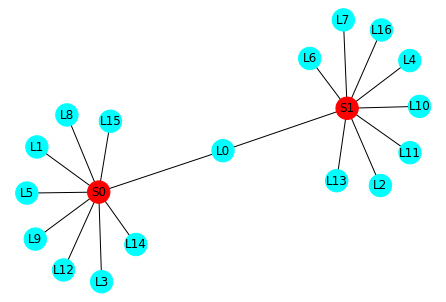

In [113]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [11]:
total_limbs_to_process = nru.error_limbs(neuron_obj)
total_limbs_to_process

array([0, 1])

# Getting the Split Suggestions

multi_soma_limbs = [0]
multi_touch_limbs = [1]


 -------- Working on limb 0------------
Starting combinations to process = [(18, 79)]


---- working on disconnecting 18 and 79
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Shortest path = [18, 19, 24, 31, 29, 28, 30, 38, 42, 47, 48, 51, 53, 66, 68, 79]
Found 0 high degree coordinates to cut
Skipping endnode 18 because skeletal distance was 290.1506725738274 and threshold was 2500
skip_nodes = [18]

Attempting the doubling back check (symmetrical so don't need to check from both sides)
  Edge: [19 24]: curr_angle = 13.86
  Edge: [24 31]: curr_angle = 16.2
  Edge: [31 29]: curr_angle = 56.53
  Edge: [29 28]: curr_angle = 48.72
  Edge: [28 30]: curr_angle = 110.35
  Edge: [30 38]: curr_angle = 17.09
  Edge: [38 42]: curr_angle = 58.12
  Edge: [42 47]: curr_angle = 47.43
  Edge: [47 48]: curr_angle = 61.24
  Edge: [48 51]: curr_angle = 9.32
  Edge: [51 53]: curr_angle = 18.68
  Edge: [53 66]: curr_angle = 22.89
  Edge: [66 68]: c

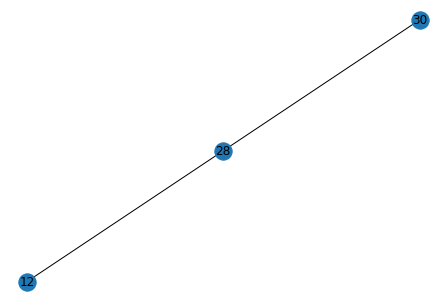

edges_to_delete = [array([12, 28]), array([28, 30])]
edges_to_create = [array([12, 30])]
edges_to_delete = [array([12, 28]), array([28, 30])]
edges_to_create = [array([12, 30])]
Accepted edge ((12, 30))
Number of connected components = 2
Comp 0 = {10, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 39, 40, 43, 44, 61, 62, 63, 64, 65, 69, 70, 71, 72, 77, 78, 82}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 16, 20, 30, 37, 38, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 66, 67, 68, 73, 74, 75, 76, 79, 80, 81}
After get best cut: cut_edges = [array([12, 28]), array([28, 30])], added_edges = [[12, 30]]
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2


 -------- Working on limb 1------------
Starting combinations to process = [(13, 12)]


---- working on disconnecting 13 and 12
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Shortest path = [13, 20,

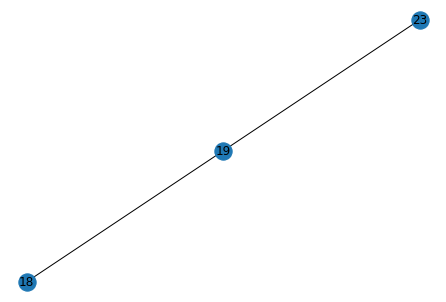

edges_to_delete = [array([19, 23])]
edges_to_create = [array([18, 23])]
edges_to_delete = [array([19, 23])]
edges_to_create = [array([18, 23])]
in remove edge
Rejected edge ((18, 23))
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 24, 25, 26, 29}
Comp 1 = {13, 20, 21, 22, 23, 27, 28}
After get best cut: cut_edges = [array([19, 23])], added_edges = []
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2


In [170]:
limb_results = pru.multi_soma_split_suggestions(neuron_obj,
                                verbose=True,
                                )

In [172]:
limb_results

{0: [{'starting_node_1': 18,
   'starting_node_2': 79,
   'title': 'S0_0 from S1_0 ',
   'edges_to_delete': [array([12, 28]), array([28, 30])],
   'edges_to_create': [[12, 30]],
   'coordinate_suggestions': [array([1367774.93035338,  333914.82128364,  896397.58453214]),
    array([1367774.93035338,  333914.82128364,  896397.58453214])],
   'successful_disconnection': True}],
 1: [{'starting_node_1': 13,
   'starting_node_2': 12,
   'title': 'S0_1 from S0_0 ',
   'edges_to_delete': [array([19, 23])],
   'edges_to_create': [],
   'coordinate_suggestions': [array([1363582.97004846,  427573.37372274,  873371.67200722])],
   'successful_disconnection': True}]}

In [171]:
pru = reload(pru)
nviz = reload(nviz)
nviz.plot_split_suggestions_per_limb(neuron_obj,limb_results)



-------- Suggestions for Limb 0------



inside suggestions




 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 1------



inside suggestions




 Working on visualization type: mesh

 Working on visualization type: skeleton


# Practice Cleaning the Skeleton

In [76]:
ret_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


(array([24., 18., 11., 11., 10.,  4.,  3.,  2.,  1.,  1.]),
 array([   379.96833788,  13108.30864615,  25836.64895442,  38564.98926269,
         51293.32957096,  64021.66987923,  76750.0101875 ,  89478.35049577,
        102206.69080404, 114935.03111231, 127663.37142058]),
 <BarContainer object of 10 artists>)

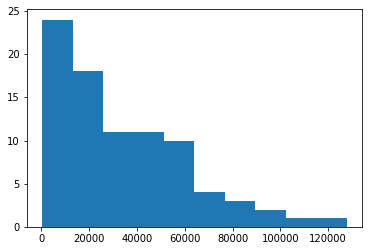

In [79]:
# getting the skeleton widths for all the branches
import matplotlib.pyplot as plt
sk_list = [sk.calculate_skeleton_distance(curr_branch.skeleton) for curr_branch in neuron_obj[0]]
plt.hist(sk_list)

In [81]:
curr_limb = neuron_obj[0]

[array([1353451.97222222,  390074.40555556,  915248.78194444]),
 array([1459910.,  355066.,  923040.])]

In [90]:
curr_limb_sk_cleaned,removed_sk = sk.clean_skeleton(neuron_obj[0].skeleton,
                 distance_func=sk.skeletal_distance,
                 min_distance_to_junction=4001,
                 return_skeleton=True,
                 endpoints_must_keep=[k["starting_coordinate"] for k in curr_limb.all_concept_network_data],
                 print_flag=True,
                                        return_removed_skeletons=True)

Using Distance measure skeletal_distance
endpoints_must_keep = [array([1353451.97222222,  390074.40555556,  915248.78194444]), array([1459910.,  355066.,  923040.])]
Number of end_nodes BEFORE filtering = 45
all_single_nodes_to_eliminate = [12, 35]
total end_nodes = [ 2677 11086]




current_end_node = 2677
current_path_to_junction = [2677, 2675.0, 2672.0, 2669.0, 2666.0, 2662.0, 2659.0, 2657.0, 2654.0, 2652.0, 2649.0]
the current distance that was below was 1306.1560917588577


current_end_node = 11086
current_path_to_junction = [11086, 11089.0, 11091.0, 11094.0, 11099.0, 11109.0, 11119.0, 11152.0, 11157.0]
the current distance that was below was 1487.457703932237

Done cleaning networkx graph with 2 paths removed


In [91]:
removed_sk

[array([[[1291170.,  344852.,  905665.],
         [1291100.,  344904.,  905537.]],
 
        [[1291170.,  344852.,  905665.],
         [1291210.,  344836.,  905730.]],
 
        [[1291210.,  344836.,  905730.],
         [1291280.,  344838.,  905821.]],
 
        [[1291280.,  344838.,  905821.],
         [1291350.,  344846.,  905914.]],
 
        [[1291350.,  344846.,  905914.],
         [1291460.,  344889.,  906039.]],
 
        [[1291460.,  344889.,  906039.],
         [1291520.,  344914.,  906096.]],
 
        [[1291520.,  344914.,  906096.],
         [1291590.,  344945.,  906156.]],
 
        [[1291590.,  344945.,  906156.],
         [1291650.,  344987.,  906220.]],
 
        [[1291070.,  344980.,  905459.],
         [1291100.,  344904.,  905537.]]]),
 array([[[1381430.,  341366.,  901736.],
         [1381400.,  341580.,  901718.]],
 
        [[1381430.,  341366.,  901736.],
         [1381470.,  341174.,  901754.]],
 
        [[1381350.,  342044.,  901710.],
         [1381360.,  341

In [95]:
nviz.plot_objects(curr_limb.mesh,
                 skeletons=[curr_limb_sk_cleaned] + removed_sk,
                 skeletons_colors=["black","red","red"],
                 #scatters=[k.reshape(-1,3) for k in removed_sk],
                 #scatter_size=0.5
                 )

# how to figure out which of the branches still remain?

In [97]:
cleaned_branches = sk.decompose_skeleton_to_branches(curr_limb_sk_cleaned)
original_branches = [k.skeleton for k in curr_limb]
len(cleaned_branches),len(original_branches)

(83, 85)

In [107]:
from tqdm_utils import tqdm
from pykdtree.kdtree import KDTree

def map_between_branches_lists(branches_1,branches_2):
    """
    Purpose: 
    Will create a unique mapping of a branch
    in the first list to the best fitting branch in the second
    in terms of the most matching coordinates with a distance of 0
    
    Ex:
    cleaned_branches = sk.decompose_skeleton_to_branches(curr_limb_sk_cleaned)
    original_branches = [k.skeleton for k in curr_limb]
    map_between_branches_lists(original_branches,cleaned_branches)
    """
    old_to_new_branch_mapping = []

    for o_br in tqdm(original_branches):
        o_br_kd = KDTree(o_br.reshape(-1,3))

        n_matches = [len(np.where(o_br_kd.query(c_br.reshape(-1,3))[0]==0)[0]) for c_br in cleaned_branches]
        old_to_new_branch_mapping.append(np.argmax(n_matches))
        
    return np.array(old_to_new_branch_mapping)

sk.map_between_branches_lists(original_branches,cleaned_branches)
    


Passed matching check


array([10, 14, 16, 17, 18, 20, 21, 22, 24, 31, 34, 39, 41, 64, 65, 69, 70,
       77, 78, 29, 63, 36, 44, 25,  3,  0, 37, 15, 42, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 58, 60, 66, 67, 68, 75, 76, 79, 80, 81, 38, 11,
       55,  5, 40, 13, 74, 59, 32, 33, 30, 28, 12, 15, 61,  6,  7,  8, 35,
       56,  4,  0, 23, 27, 82, 62, 19,  1,  2, 71, 72,  9, 43, 73, 57, 26])

In [75]:
poisson_mesh = tu.poisson_surface_reconstruction(curr_branch.mesh)
nviz.plot_objects(tu.split_significant_pieces(poisson_mesh)[0])

xvfb-run -n 7591 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Auto_Proofreading/Limb_Neuron_Splitting/temp/mesh_394.off -o /notebooks/Auto_Proofreading/Limb_Neuron_Splitting/temp/mesh_394_poisson.off -s /notebooks/Auto_Proofreading/Limb_Neuron_Splitting/temp/poisson_383945.mls
removed temporary input file: /notebooks/Auto_Proofreading/Limb_Neuron_Splitting/temp/mesh_394.off
removed temporary output file: /notebooks/Auto_Proofreading/Limb_Neuron_Splitting/temp/mesh_394_poisson.off


In [71]:
curr_branch = neuron_obj[0][5]
curr_branch.width_new

{'median_mesh_center': 364.8917511432021,
 'no_spine_median_mesh_center': 287.8341139995117}

No limb name was given so using L0 because was the limb in the first key


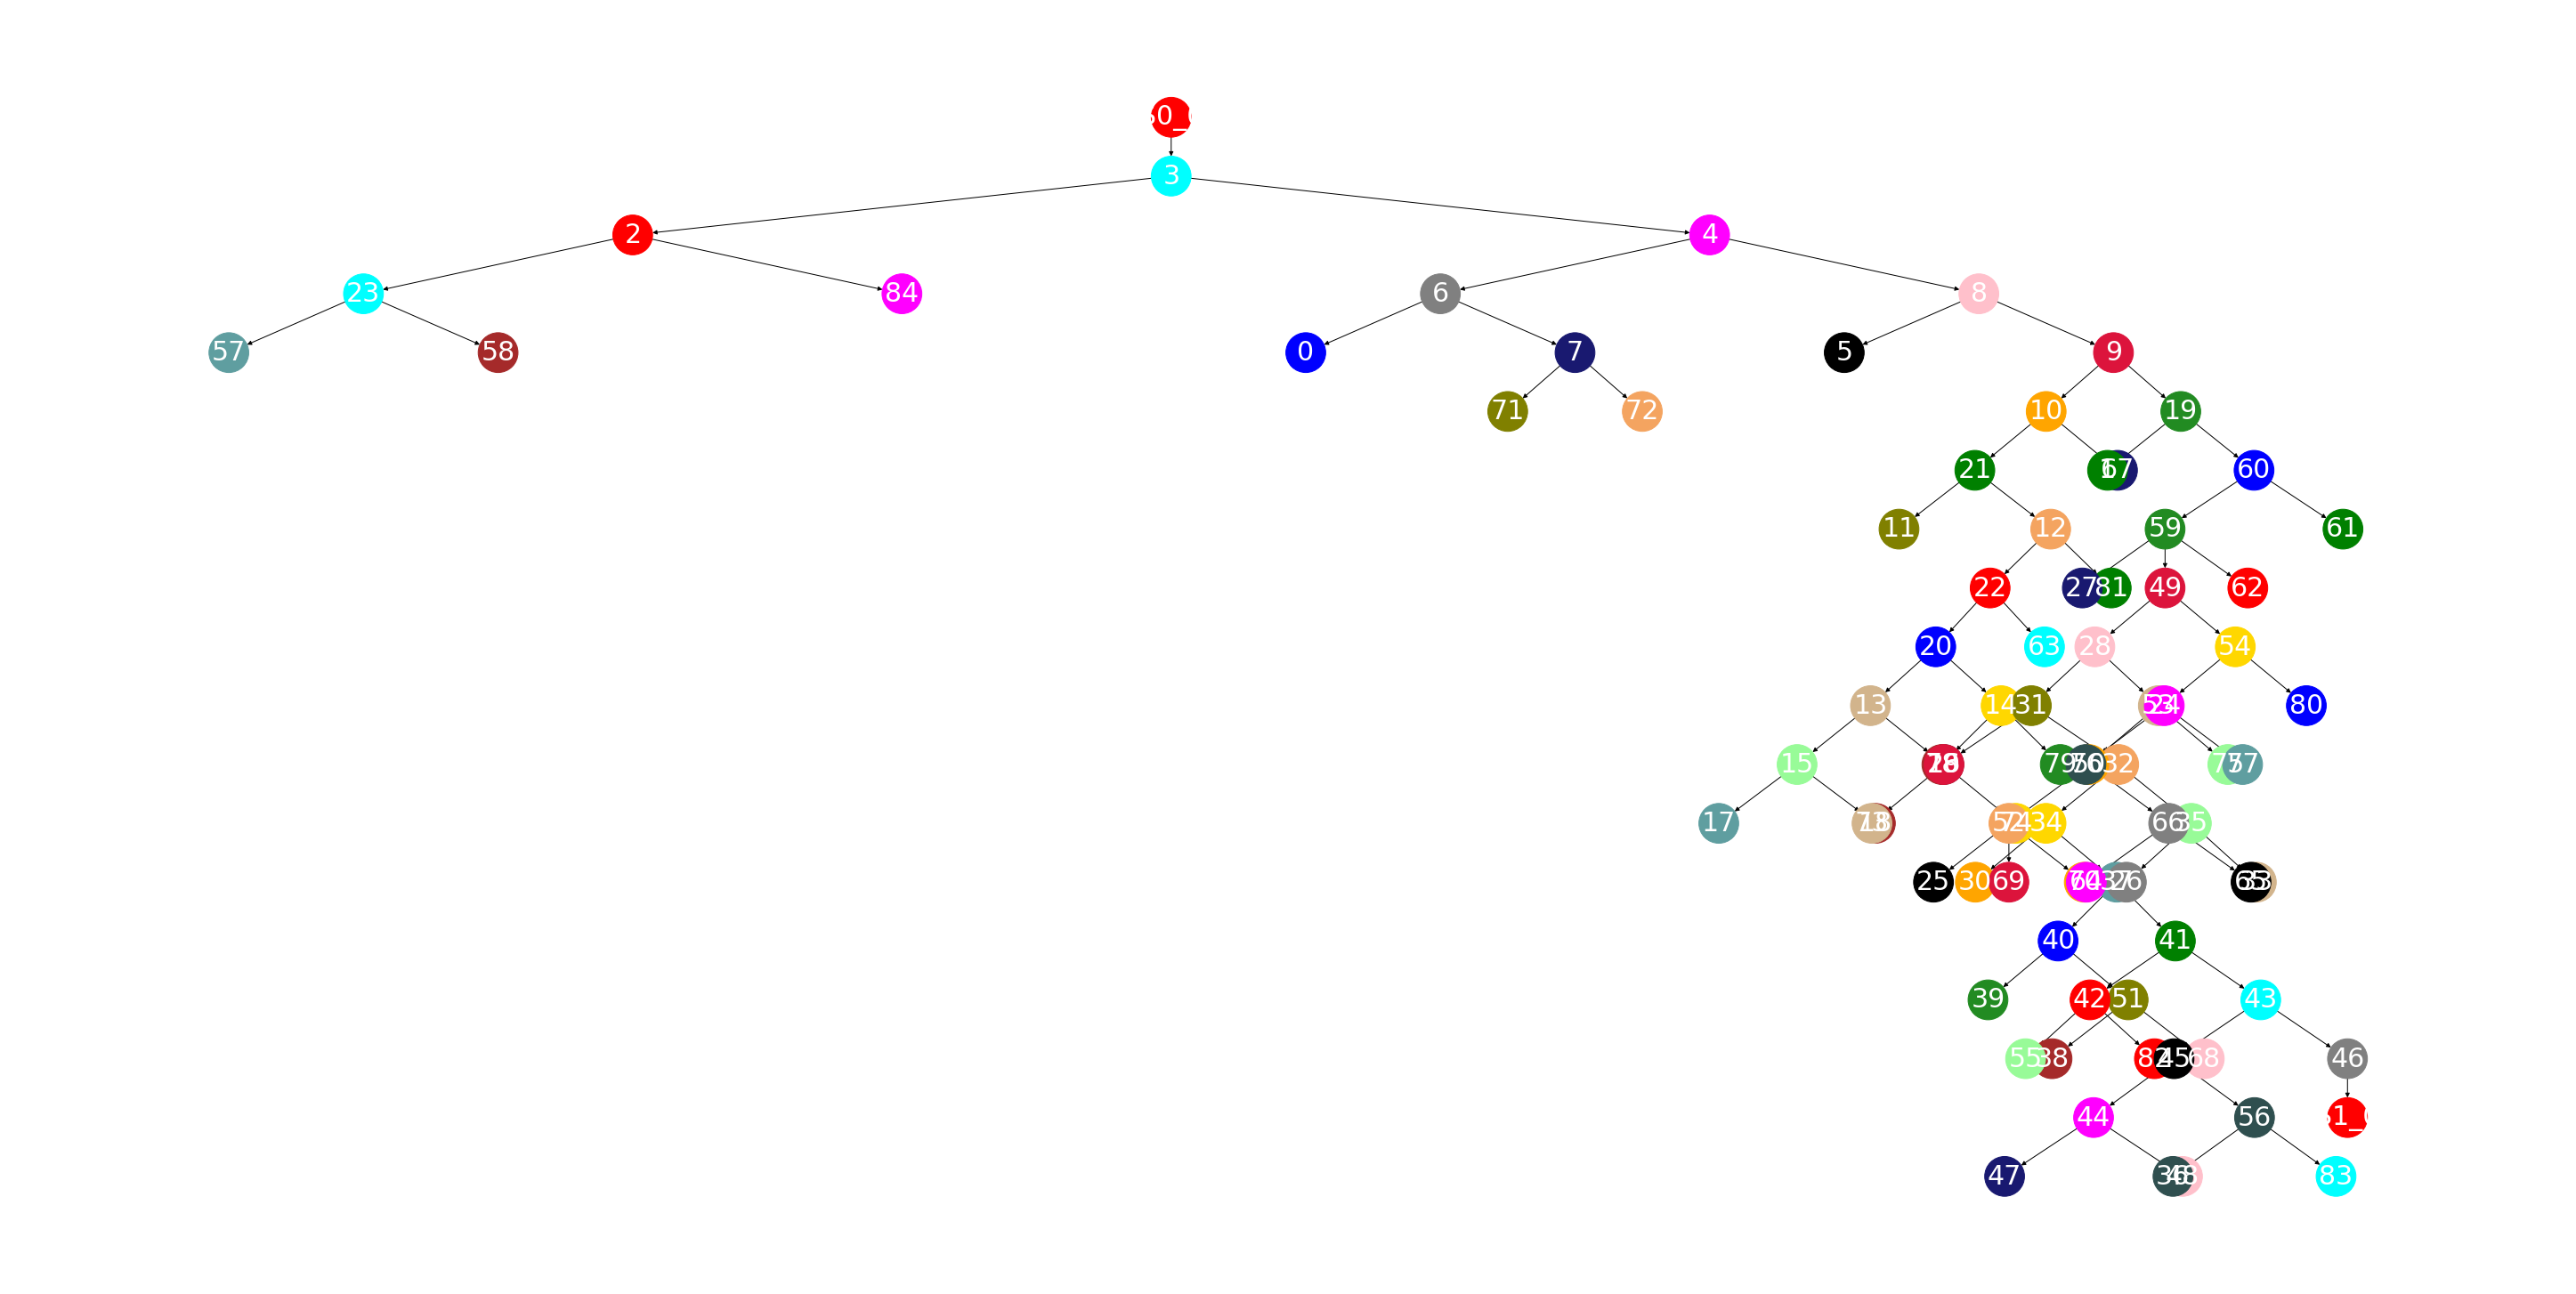

In [68]:
nviz.plot_limb_concept_network_2D(neuron_obj,
                                 node_colors=ret_col)

# Split the Neuron



------ Working on Soma 0 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 0.7710669040679932


------ Working on Soma 1 -------
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 0.9089004993438721


Number of seperate neuron objects = 2

 Working on visualization type: mesh

 Working on visualization type: skeleton



 Working on visualization type: mesh

 Working on visualization type: skeleton


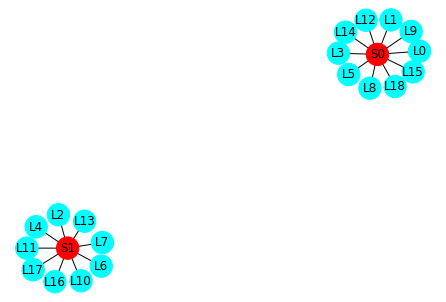

In [173]:
neuron_list = pru.split_neuron(neuron_obj,
                plot_soma_limb_network=True,
                 plot_seperated_neurons=True)

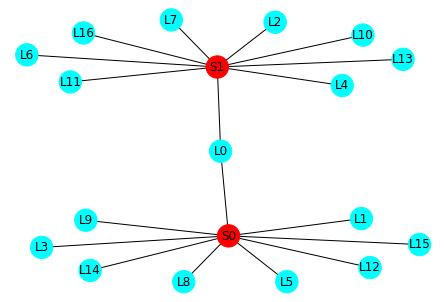

In [174]:
nviz.plot_soma_limb_concept_network(neuron_obj)